### the logit lens on gpt2 activations
https://www.lesswrong.com/posts/AcKRB8wDpdaN6v6ru/interpreting-gpt-the-logit-lens 

In [8]:
# mini nb  #mm

In [9]:
import transformers

tokenizer = transformers.AutoTokenizer.from_pretrained("gpt2")

In [10]:
gpt3_abstract = """Recent work has demonstrated substantial gains on many NLP tasks and benchmarks by pre-training
on a large corpus of text followed by fine-tuning on a specific task. While typically task-agnostic
in architecture, this method still requires task-specific fine-tuning datasets of thousands or tens of
thousands of examples. By contrast, humans can generally perform a new language task from only
a few examples or from simple instructions – something which current NLP systems still largely
struggle to do. Here we show that scaling up language models greatly improves task-agnostic,
few-shot performance, sometimes even reaching competitiveness with prior state-of-the-art finetuning approaches. Specifically, we train GPT-3, an autoregressive language model with 175 billion
parameters, 10x more than any previous non-sparse language model, and test its performance in
the few-shot setting. For all tasks, GPT-3 is applied without any gradient updates or fine-tuning,
with tasks and few-shot demonstrations specified purely via text interaction with the model. GPT-3
achieves strong performance on many NLP datasets, including translation, question-answering, and
cloze tasks, as well as several tasks that require on-the-fly reasoning or domain adaptation, such as
unscrambling words, using a novel word in a sentence, or performing 3-digit arithmetic. At the same
time, we also identify some datasets where GPT-3’s few-shot learning still struggles, as well as some
datasets where GPT-3 faces methodological issues related to training on large web corpora. Finally,
we find that GPT-3 can generate samples of news articles which human evaluators have difficulty
distinguishing from articles written by humans. We discuss broader societal impacts of this finding
and of GPT-3 in general.""".replace("\n", " ")

plasma = """Sometimes, when people say plasma, they mean a state of matter. Other times, when people say plasma"""
plasma_short = """That's my first example of plasma. My second example of"""

plasma_repetitive = """I love plasma. I love plasma. I love plasma. I love plasma."""

seals = """ I'll have you know I graduated top of my class in the Navy Seals, and I've been involved in numerous secret raids on"""

In [11]:
import torch

def text_to_input_ids(text):
    toks = tokenizer.encode(text)
    return torch.as_tensor(toks).view(1, -1)           #.cuda()

In [13]:
model = transformers.AutoModelForCausalLM.from_pretrained('gpt2')

In [18]:
gpt3_abstract = """ Highly theoretical justifications for having fun""".replace("\n", " ")

In [20]:
input_ids = text_to_input_ids(gpt3_abstract)

input_ids = input_ids[:, :160]
input_ids.shape
input_ids

tensor([[38254, 16200,   655,  6637,   329,  1719,  1257]])

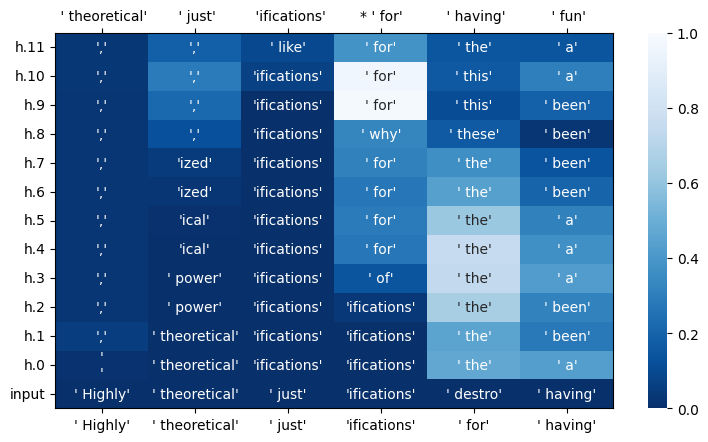

In [24]:
from transformer_utils.logit_lens import plot_logit_lens

plot_logit_lens(model, tokenizer, input_ids,  start_ix=0, end_ix=-1,  probs=True) #      start_ix=135, end_ix=160,  probs=True)   #  )#    

In [22]:
plot_logit_lens(model, tokenizer, input_ids, start_ix=135, end_ix=160, ranks=True)

ValueError: need at least one array to stack

K-L divergence w/r/t the final output distribution.

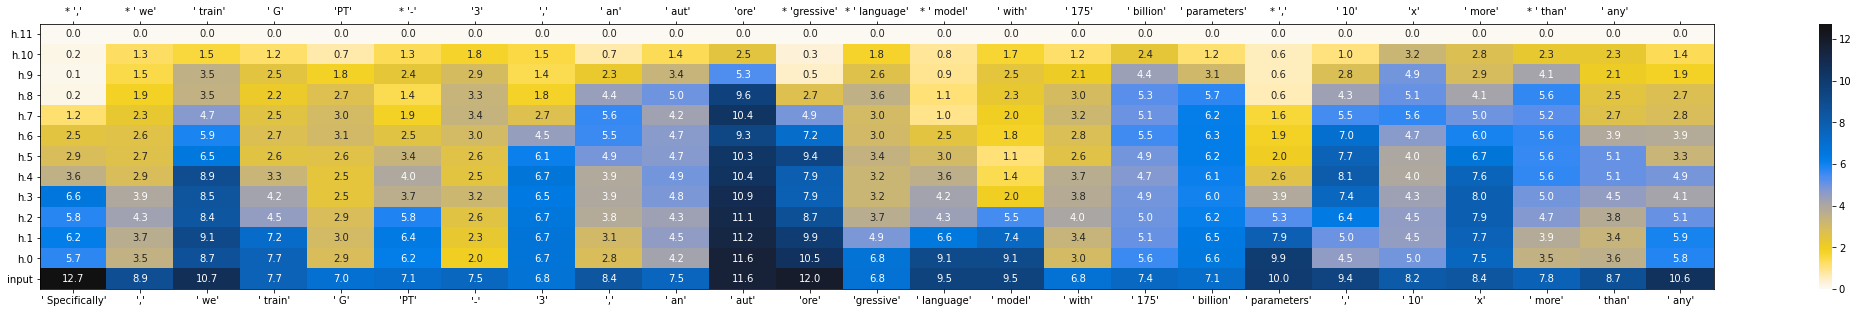

In [ ]:
plot_logit_lens(model, tokenizer, input_ids, start_ix=135, end_ix=160, kl=True)

##### subblocks

a transformer block is actually 2 residual layers: an attn part followed by an mlp part.

here, we break them down:

- predictions after just the attn part of a block
- predictions after the full block (= after the mlp part too)

let's do ranks for this one

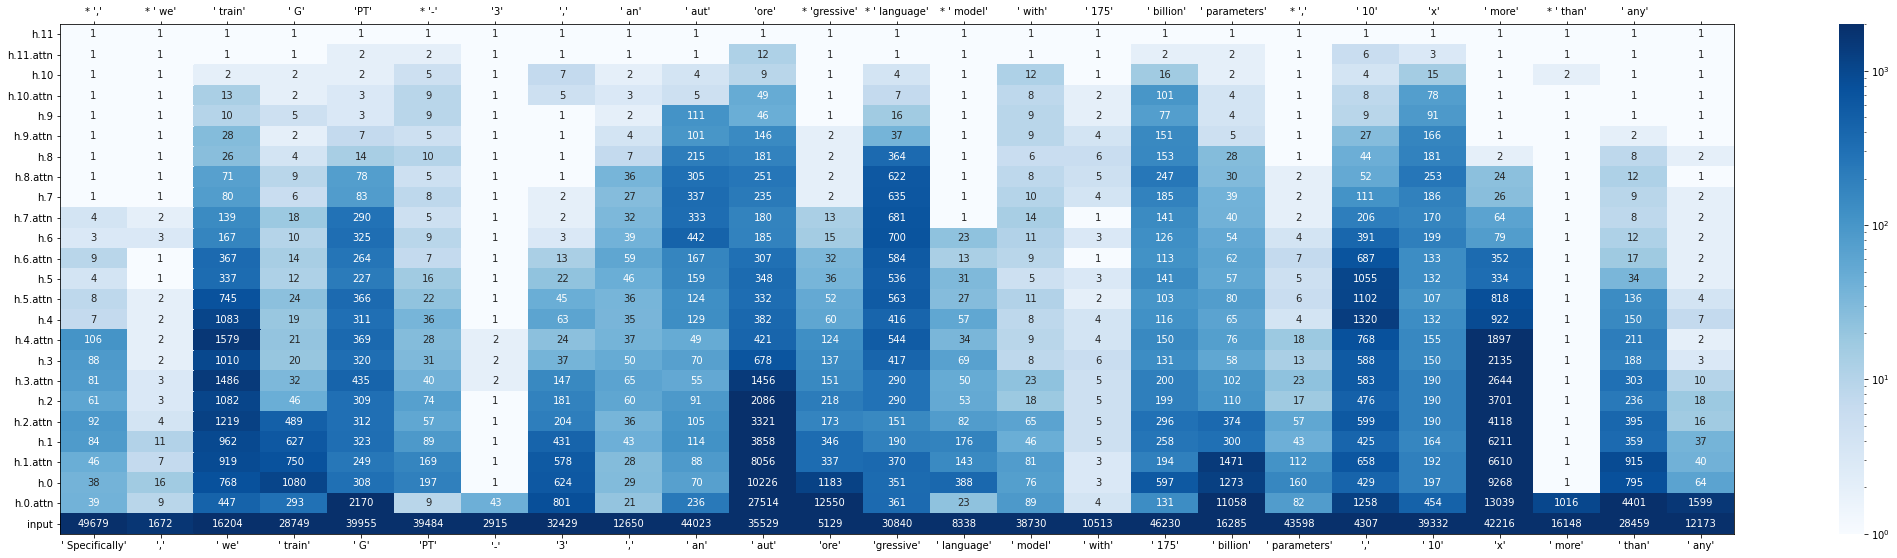

In [ ]:
plot_logit_lens(model, tokenizer, input_ids, start_ix=135, end_ix=160, ranks=True, include_subblocks=True)